## Data Preprocessing

In [1]:
import os
import numpy as np
from os import listdir
from matplotlib.pyplot import imread
from skimage.transform import resize
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


# Settings:
img_size = 64
grayscale_images = True
num_class = 10
test_size = 0.2


def get_img(data_path):
    # Getting image array from path:
    img = imread(data_path)
    img = resize(img, (img_size, img_size, 1 if grayscale_images else 3))
    return img


def get_dataset(dataset_path='Dataset'):
    # Getting all data from data path:
    try:
        X = np.load('npy_dataset/X.npy')
        Y = np.load('npy_dataset/Y.npy')
    except:
        labels = listdir(dataset_path)  # Geting labels
        X = []
        Y = []
        for i, label in enumerate(labels):
            datas_path = dataset_path + '/' + label
            for data in listdir(datas_path):
                img = get_img(datas_path + '/' + data)
                X.append(img)
                Y.append(i)
        # Create dateset:
        X = 1 - np.array(X).astype('float32') / 255.0
        Y = np.array(Y).astype('float32')
        Y = to_categorical(Y, num_class)
        if not os.path.exists('npy_dataset/'):
            os.makedirs('npy_dataset/')
        np.save('npy_dataset/X.npy', X)
        np.save('npy_dataset/Y.npy', Y)
    X, X_test, Y, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
    return X, X_test, Y, Y_test


X, X_test, Y, Y_test = get_dataset()


## Imports

In [22]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report
y = np.argmax(Y, axis=1)
y_test = np.argmax(Y_test, axis=1)
y.shape

(1649,)

In [23]:
def visualize_image_gray(image, label):
    plt.axis('off')
    plt.title(label)
    plt.imshow(image, cmap=plt.cm.binary)

In [24]:
def visualize_image_rgb(image, label):
    plt.axis('off')
    plt.title(label)
    plt.imshow(image)

## Images Visualization

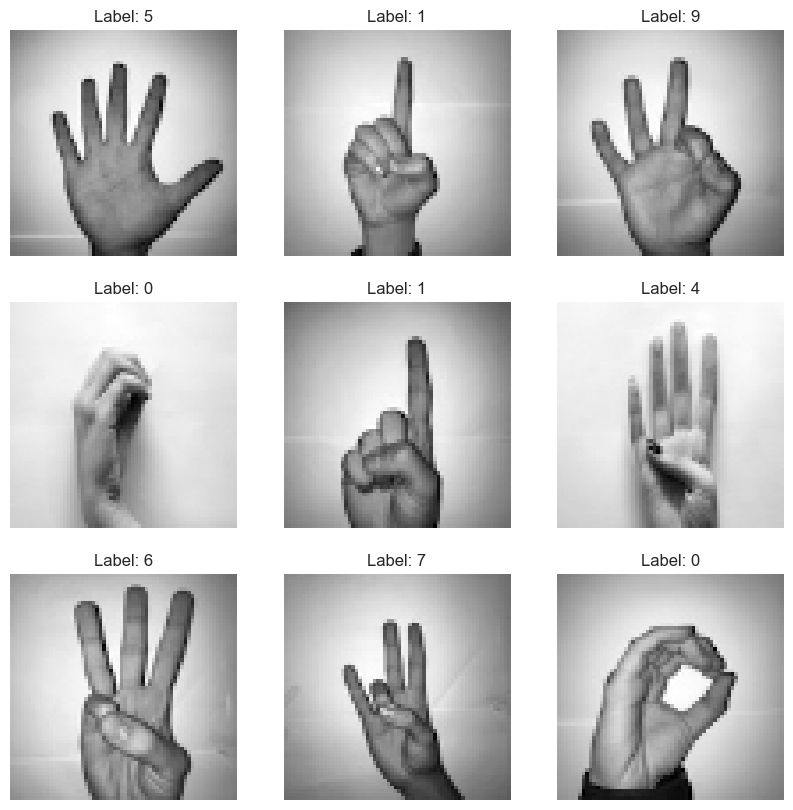

In [25]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    visualize_image_gray(X[i * 100], label="Label: " + str(y[i * 100]))

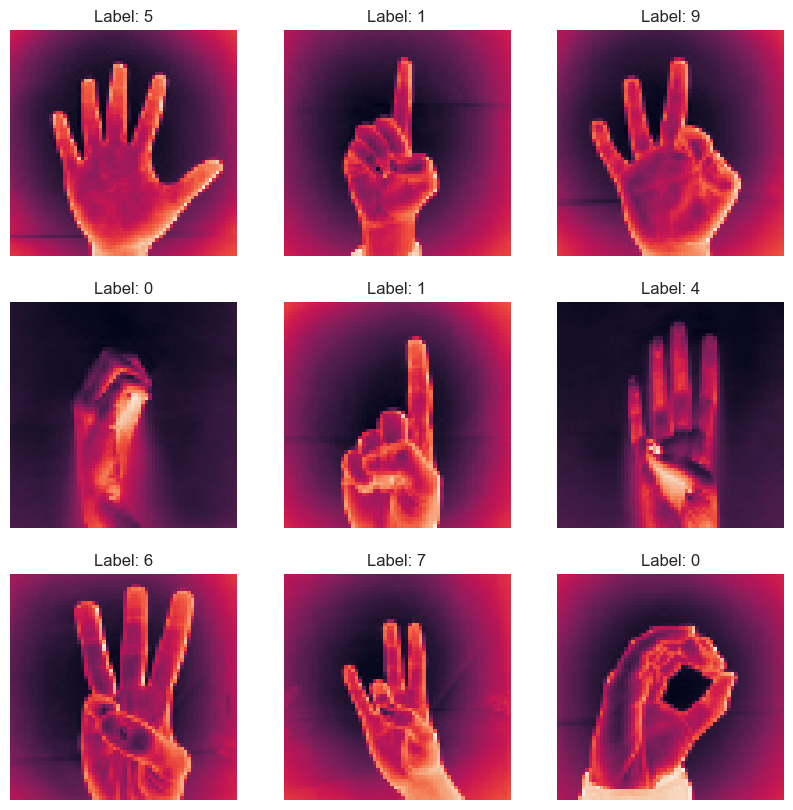

In [26]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    visualize_image_rgb(X[i * 100], label="Label: " + str(y[i * 100]))

## Preparing model

In [27]:
inputs = tf.keras.Input(shape=(64, 64, 1))

conv1 = tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu')(inputs)
pool1 = tf.keras.layers.AveragePooling2D()(conv1)

conv2 = tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu')(pool1)
pool2 = tf.keras.layers.AveragePooling2D()(conv2)

flatten = tf.keras.layers.Flatten()(pool2)

dense1 = tf.keras.layers.Dense(units=120, activation='relu')(flatten)
dense2 = tf.keras.layers.Dense(units=84, activation='relu')(dense1)

outputs = tf.keras.layers.Dense(units=10, activation='softmax')(dense2)


model = tf.keras.Model(inputs=inputs, outputs=outputs)

## Training

In [28]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X,
    y,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
42/42 [==============================] - 2s 32ms/step - loss: 2.3118 - accuracy: 0.0948 - val_loss: 2.3032 - val_accuracy: 0.0848
Epoch 2/100
42/42 [==============================] - 1s 26ms/step - loss: 2.3026 - accuracy: 0.0955 - val_loss: 2.3039 - val_accuracy: 0.0848
Epoch 3/100
42/42 [==============================] - 1s 26ms/step - loss: 2.3021 - accuracy: 0.1107 - val_loss: 2.3045 - val_accuracy: 0.0939
Epoch 4/100
42/42 [==============================] - 1s 26ms/step - loss: 2.3023 - accuracy: 0.1092 - val_loss: 2.3045 - val_accuracy: 0.0939
Epoch 5/100
42/42 [==============================] - 1s 26ms/step - loss: 2.3020 - accuracy: 0.1092 - val_loss: 2.3047 - val_accuracy: 0.0939
Epoch 6/100
42/42 [==============================] - 1s 26ms/step - loss: 2.3018 - accuracy: 0.1092 - val_loss: 2.3054 - val_accuracy: 0.0939


## Evaluating

In [29]:
def evaluate_model(model, X_test, y_test):
    
    y_pred = np.argmax(model.predict(X_test), axis=1)
    
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred)
    
    results = model.evaluate(X_test, y_test, verbose=0)
    print("Test Loss: {:.5f}".format(results[0]))
    print("Test Accuracy: {:.2f}%".format(results[1] * 100))
    
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

c:\Users\abdal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abdal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abdal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Test Loss: 2.30356
Test Accuracy: 9.20%


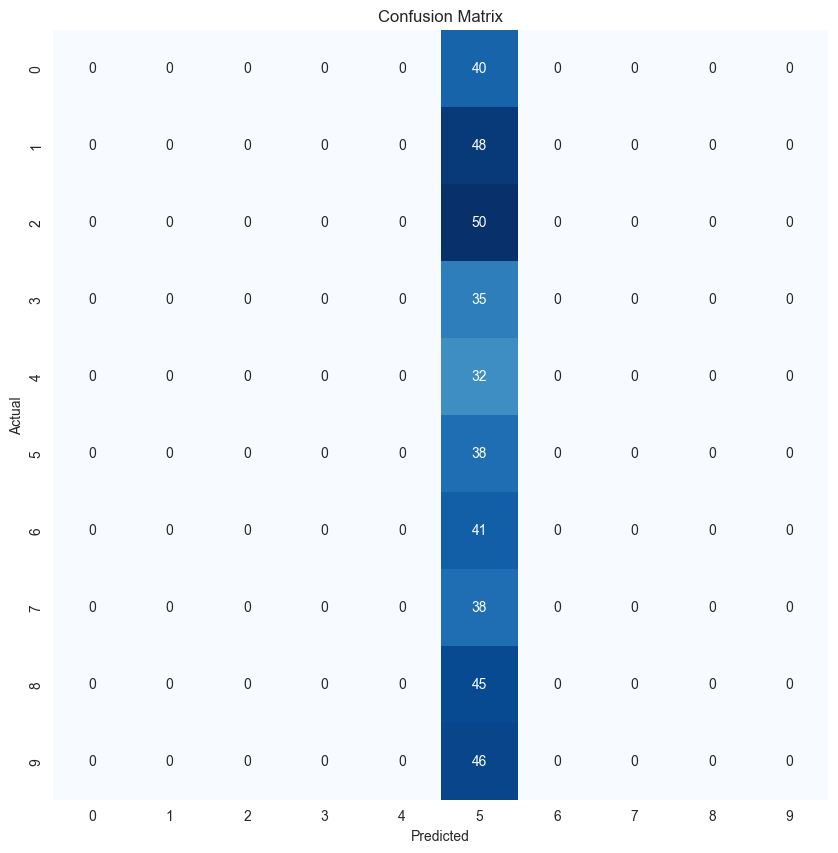

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.00      0.00      0.00        48
           2       0.00      0.00      0.00        50
           3       0.00      0.00      0.00        35
           4       0.00      0.00      0.00        32
           5       0.09      1.00      0.17        38
           6       0.00      0.00      0.00        41
           7       0.00      0.00      0.00        38
           8       0.00      0.00      0.00        45
           9       0.00      0.00      0.00        46

    accuracy                           0.09       413
   macro avg       0.01      0.10      0.02       413
weighted avg       0.01      0.09      0.02       413



In [30]:
evaluate_model(model, X_test, y_test)